<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/07.05.2024/UnderHood2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List, array tensor

In [2]:
from fastai.vision.all import *

data = [[1,2,3],[4,5,6]] # nested list
arr = array(data) # numpy array
tns = tensor(data) # torch tensor


In [3]:
data

[[1, 2, 3], [4, 5, 6]]

In [4]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

**Model aniqligini broadcasting orqali aniqlash**

In [12]:
path = untar_data(URLs.MNIST_SAMPLE)


In [14]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [15]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [16]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

(<Axes: >, <Axes: >)

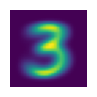

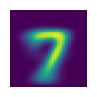

In [18]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7)

In [19]:
s_3 = stacked_threes[1]
s_7 = stacked_sevens[1]

In [10]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

MAE ni hisonlashni funksiyaga aylantiramiz!

In [23]:
# mae xatolik funksiyasi!
def mae(a, b):
  return (a-b).abs().mean((-1,-2))

# tekshirish
mae(s_3, mean3)


valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)


valid_3_errors, valid_3_errors.shape


(tensor([0.1381, 0.1414, 0.1403,  ..., 0.1424, 0.1162, 0.1587]),
 torch.Size([1010]))

# natijalovchi funksiya

In [26]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [28]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))